IOWA 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
import math

In [15]:
train = pd.read_excel('IOWA_Training_Data.xlsx')
# 1 = good, 0 = default
print(train.head())

   OverallQual  GrLivArea  Sale Price
0            7       1710       208.5
1            6       1262       181.5
2            7       1786       223.5
3            7       1717       140.0
4            8       2198       250.0


In [16]:
# remove target column to create feature only dataset
X_train = train.drop('Sale Price',axis=1)
# store target column
y_train = train['Sale Price']
print(X_train.shape, y_train.shape)

(1800, 2) (1800,)


In [17]:
X_train.columns = ['OverallQual','GRLivArea']

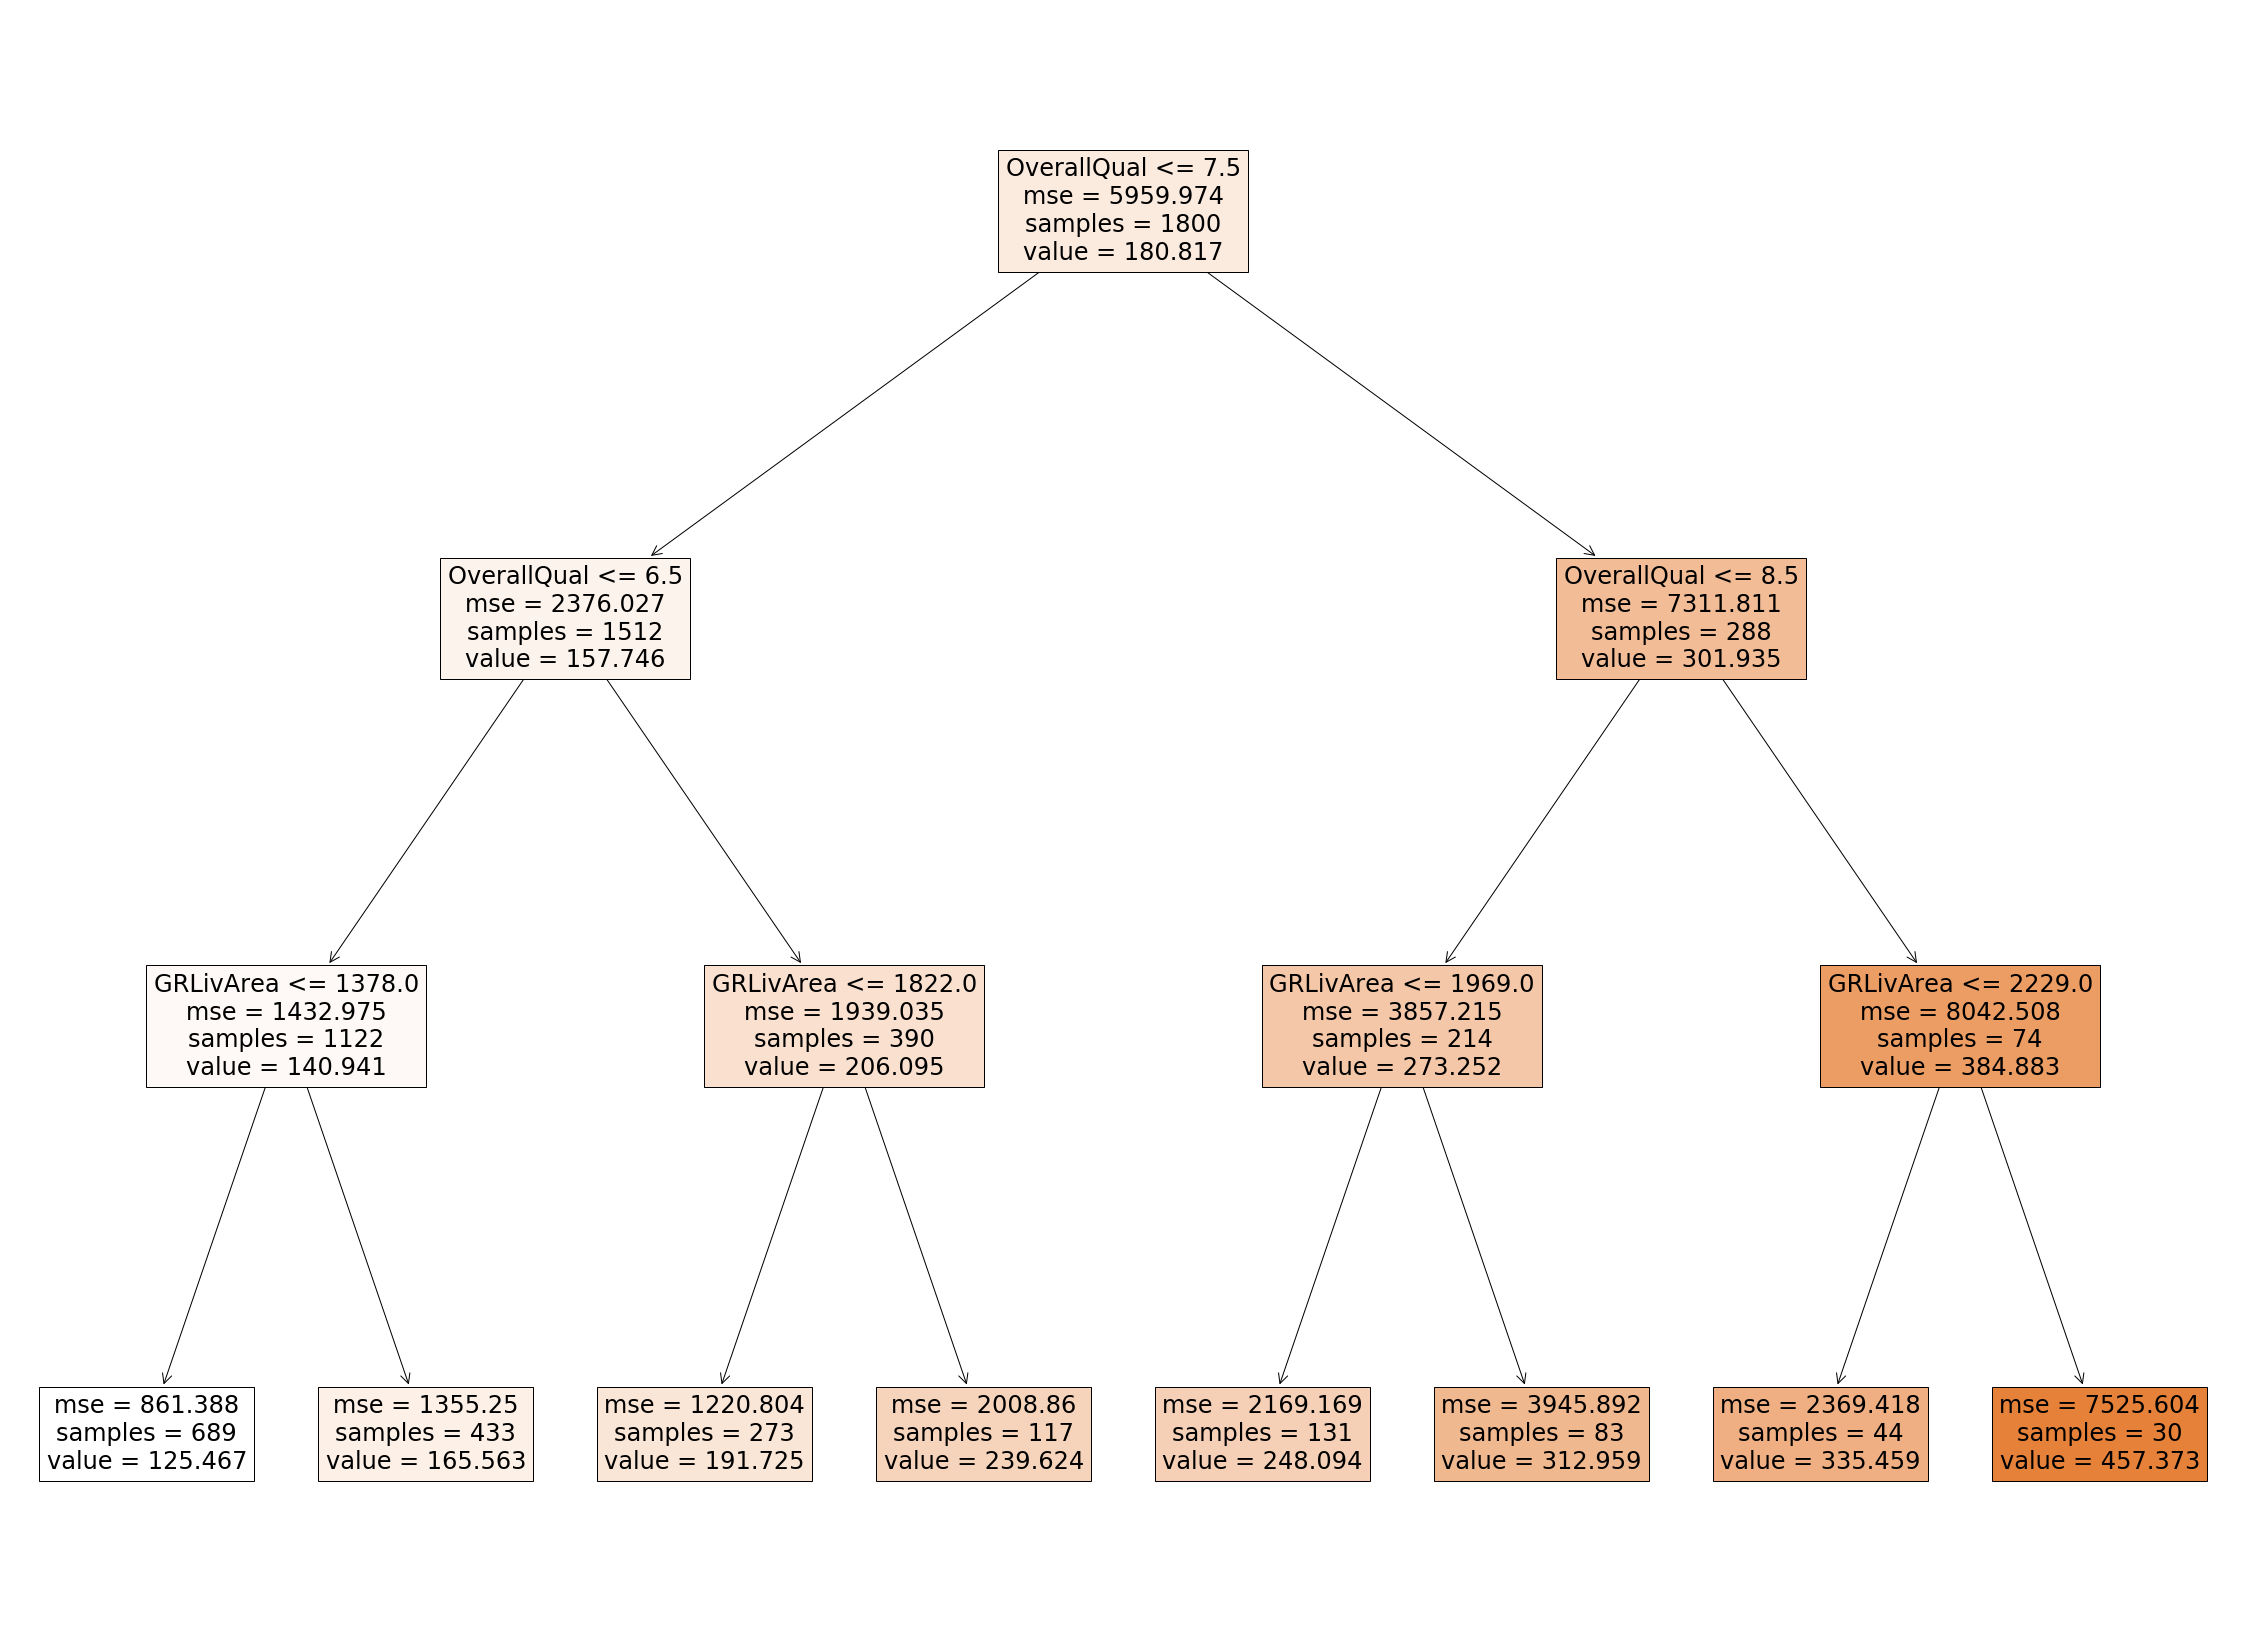

In [18]:
pred = DecisionTreeRegressor(criterion='mse',max_depth=3,random_state=0)
pred = pred.fit(X_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred, filled=True, feature_names=X_train.columns, proportion=False)
plt.show()

In [19]:
r = export_text(pred,feature_names=['OverallQual','GRLivArea'])

In [20]:
print(r)

|--- OverallQual <= 7.50
|   |--- OverallQual <= 6.50
|   |   |--- GRLivArea <= 1378.00
|   |   |   |--- value: [125.47]
|   |   |--- GRLivArea >  1378.00
|   |   |   |--- value: [165.56]
|   |--- OverallQual >  6.50
|   |   |--- GRLivArea <= 1822.00
|   |   |   |--- value: [191.72]
|   |   |--- GRLivArea >  1822.00
|   |   |   |--- value: [239.62]
|--- OverallQual >  7.50
|   |--- OverallQual <= 8.50
|   |   |--- GRLivArea <= 1969.00
|   |   |   |--- value: [248.09]
|   |   |--- GRLivArea >  1969.00
|   |   |   |--- value: [312.96]
|   |--- OverallQual >  8.50
|   |   |--- GRLivArea <= 2229.00
|   |   |   |--- value: [335.46]
|   |   |--- GRLivArea >  2229.00
|   |   |   |--- value: [457.37]



In [21]:
validation = pd.read_excel('IOWA_Validation_Data.xlsx')
# 1 = good, 0 = default
print(validation.head())

   OverallQual  GrLivArea  Sale Price
0            6       1045       127.0
1            6       1378       128.9
2            6       1944       103.5
3            5       1306       130.0
4            5       1464       129.0


In [22]:
# remove target column to create feature only dataset
X_validation = validation.drop('Sale Price',axis=1)
# store target column
y_validation = validation['Sale Price']
print(X_validation.shape, y_validation.shape)

(600, 2) (600,)


In [23]:
test = pd.read_excel('IOWA_Test_Data.xlsx')
# 1 = good, 0 = default
print(test.head())

   OverallQual  GrLivArea  Sale Price
0            5       1053      142.10
1            5       1144      120.00
2            6       1721      174.85
3            5        922      116.00
4            5       1411      130.00


In [24]:
# remove target column to create feature only dataset
X_test = test.drop('Sale Price',axis=1)
# store target column
y_test = test['Sale Price']
print(X_test.shape, y_test.shape)

(508, 2) (508,)


In [25]:
y_pred_train=pred.predict(X_train)
mse = mean_squared_error(y_pred_train,y_train)
rmse=math.sqrt(mse)
print("rmse for training set")
print(rmse)

rmse for training set
38.660405648678584


In [26]:
y_pred_validation=pred.predict(X_validation)
mse = mean_squared_error(y_pred_validation,y_validation)
rmse=math.sqrt(mse)
print("rmse for validation set")
print(rmse)

rmse for validation set
40.462035147026455


In [27]:
y_pred_test=pred.predict(X_test)
mse = mean_squared_error(y_pred_test,y_test)
rmse=math.sqrt(mse)
print("rmse for test set")
print(rmse)

rmse for test set
39.048800554631995
